# Problem Statement: [Mercedes-Benz Greener Manufacturing]


### Objective: To Reduce the time a Mercedes-Benz spends on the test bench

In [133]:
import pandas as pd

In [203]:
merc_train = pd.read_csv('train.csv')

In [204]:
merc_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [205]:
print(merc_train.shape)
#print(merc_test.shape)

(4209, 378)


In [206]:
merc_train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [207]:
merc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


## Check for variance of the columns, and drop those columns from the data##

In [208]:
merc_train.var()

ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [209]:
def var_zero_cols(df):
    var_df=pd.DataFrame(df.var(),columns=['Variance'])
    return(list(var_df[var_df.Variance==0].index))

In [210]:
var_zero_cols(merc_train)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [211]:
var_df=pd.DataFrame(merc_train.var(),columns=['Variance'])

In [212]:
var_df[var_df.Variance==0].index

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

**Above columns have zero variance, so dropping them from the data**

In [213]:
merc_train.drop(columns=list(var_df[var_df.Variance==0].index),inplace=True)

In [214]:
merc_train.shape

(4209, 366)

## Check for null and unique values for train set##

In [215]:
train_nullcheck_df=pd.DataFrame(merc_train.isna().any(),columns=['IsNull'])

In [216]:
train_nullcheck_df[train_nullcheck_df.IsNull==True]

,IsNull


**There are no null values in the train data**

In [217]:
merc_train.nunique()

ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64

In [218]:
train_merc_ucnt=pd.DataFrame(merc_train.nunique(),columns=['uniqueCount'])

In [219]:
train_merc_ucnt[train_merc_ucnt.uniqueCount>2]

,uniqueCount
ID,4209
y,2545
X0,47
X1,27
X2,44
X3,7
X4,4
X5,29
X6,12
X8,25


In [220]:
train_merc_ucnt[train_merc_ucnt.uniqueCount<=2]

,uniqueCount
X10,2
X12,2
X13,2
X14,2
X15,2
...,...
X380,2
X382,2
X383,2
X384,2


**All the above columns X0 to X8 are categorical data, so we need to transform them into numerical. Before that Lets look at categorical data and plot them to observe the impact on outcome**

## Analyzing feature X0 ##

In [221]:
merc_train.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

<AxesSubplot:xlabel='X0', ylabel='y'>

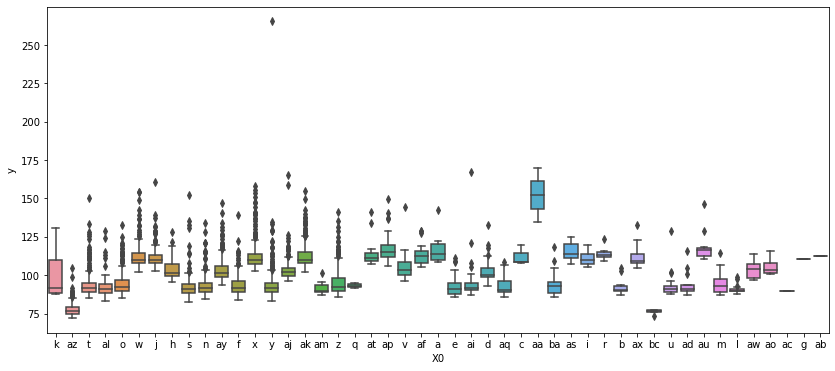

In [222]:
import matplotlib.pyplot as plt,seaborn as sns
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X0,y=merc_train.y)

In [223]:
merc_train.X0[merc_train.X0=='y']

24      y
53      y
58      y
61      y
62      y
       ..
4156    y
4159    y
4167    y
4181    y
4196    y
Name: X0, Length: 324, dtype: object

<AxesSubplot:xlabel='X0', ylabel='y'>

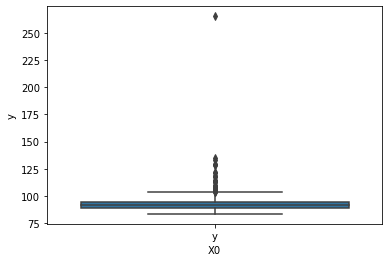

In [224]:
sns.boxplot(x=merc_train.X0[merc_train.X0=='y'],y=merc_train.y)

In [225]:
merc_train[merc_train.X0=='y']['y'].sort_values(ascending=False)[:1].index.values

array([883], dtype=int64)

In [226]:
((merc_train[merc_train.X0=='y']['y']).sort_values(ascending=False))[:1].index.values

array([883], dtype=int64)

**Dropping the extreme outlier observation**

In [227]:
merc_train.shape

(4209, 366)

In [228]:
merc_train.drop(labels=((merc_train[merc_train.X0=='y']['y']).sort_values(ascending=False))[:1].index.values,inplace=True)

In [229]:
merc_train.shape

(4208, 366)

<AxesSubplot:xlabel='X0', ylabel='y'>

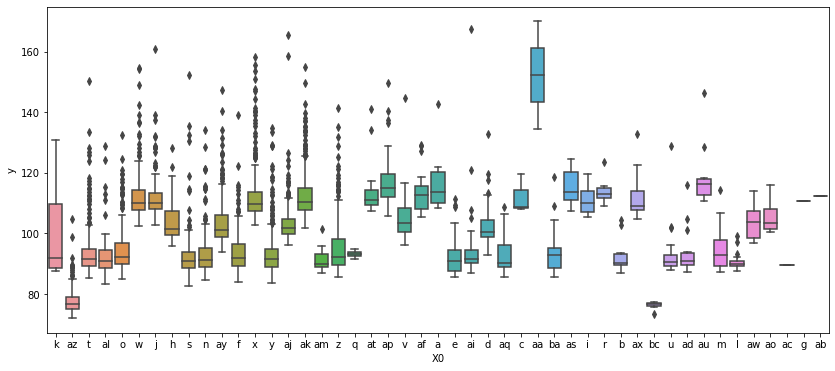

In [230]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X0,y=merc_train.y)

In [231]:
merc_train.X0.value_counts()

z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [232]:
def transform_X0(df):
    x0_grp=df.groupby('X0').aggregate(func='count')['ID'].reset_index()
    df['X0'].replace(to_replace=x0_grp[x0_grp['ID']<100]['X0'].values
                            ,value='OT'
                            ,inplace=True)

In [233]:
transform_X0(merc_train)

In [234]:
merc_train.X0.value_counts()

OT    668
z     360
ak    349
y     323
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
Name: X0, dtype: int64

<AxesSubplot:xlabel='X0', ylabel='y'>

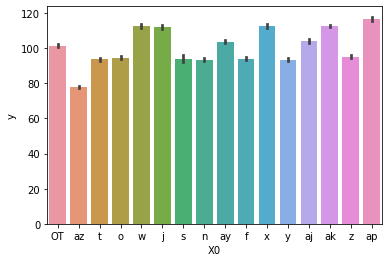

In [235]:
sns.barplot(x=merc_train.X0,y=merc_train.y)

## Analyzing feature X1##

In [236]:
merc_train.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     250
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='y'>

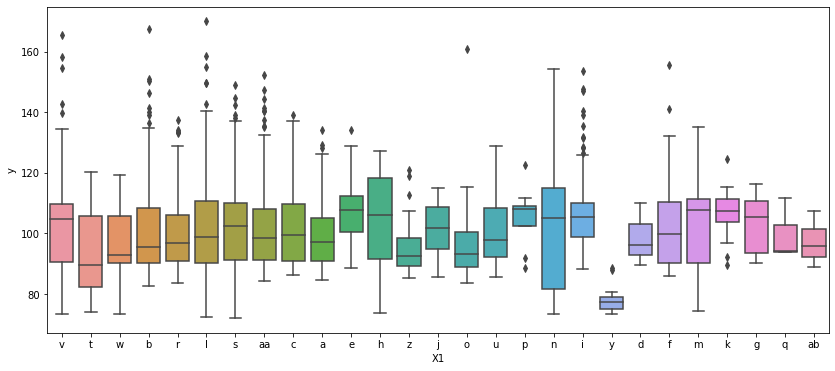

In [237]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X1,y=merc_train.y)

In [241]:
t=merc_train.groupby('X1').aggregate(func='count')['ID'].reset_index()
t

,X1,ID
0,a,143
1,aa,833
2,ab,3
3,b,592
4,c,121
5,d,3
6,e,33
7,f,23
8,g,6
9,h,29


In [240]:
t[t['ID']<100]['X1'].values

array(['ab', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'm', 'n', 'o', 'p', 'q',
       't', 'u', 'w', 'y', 'z'], dtype=object)

In [242]:
def transform_X1(df):
    x1_grp=df.groupby('X1').aggregate(func='count')['ID'].reset_index()
    df['X1'].replace(to_replace=x1_grp[x1_grp['ID']<100]['X1'].values
                            ,value='OT'
                            ,inplace=True)

In [243]:
transform_X1(merc_train)

In [244]:
merc_train.X1.value_counts()

aa    833
s     598
b     592
l     590
OT    470
v     408
r     250
i     203
a     143
c     121
Name: X1, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='y'>

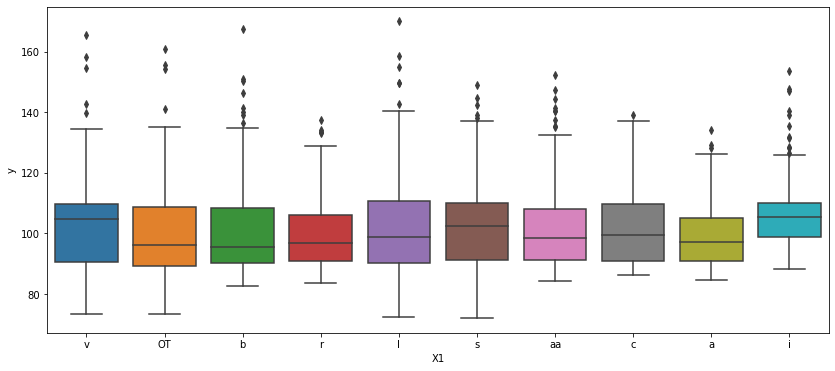

In [245]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X1,y=merc_train.y)

<AxesSubplot:xlabel='X1', ylabel='y'>

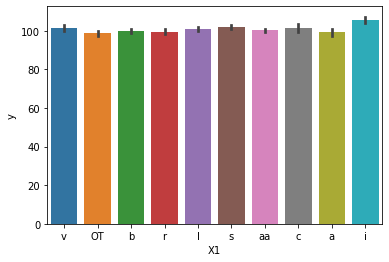

In [246]:
sns.barplot(x=merc_train.X1,y=merc_train.y)

## Analyzing feature X3 ##

In [247]:
merc_train.X3.value_counts()

c    1942
f    1075
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

<AxesSubplot:xlabel='X3', ylabel='y'>

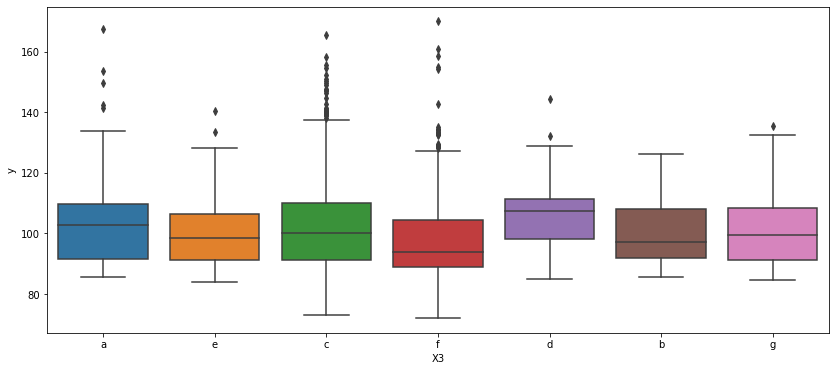

In [248]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X3,y=merc_train.y)

<AxesSubplot:xlabel='X3', ylabel='y'>

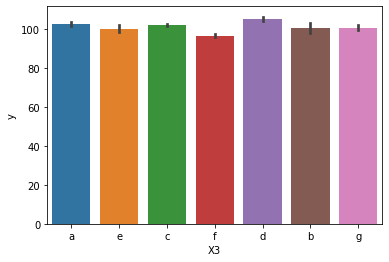

In [249]:
sns.barplot(x=merc_train.X3,y=merc_train.y)

**There are not too many labels, so leaving the data as is**

## Analyzing feature X4 ##

In [250]:
merc_train.X4.value_counts()

d    4204
a       2
b       1
c       1
Name: X4, dtype: int64

**It is evident from the above counts that X4 is 'd' in more than 99% of the cases, so transforming the data to d, ~d** 

In [252]:
merc_train[merc_train.X4!='d']['X4'].values

array(['b', 'c', 'a', 'a'], dtype=object)

In [42]:
def transform_X4(df):
    df['X4'].replace(to_replace=df[df.X4!='d']['X4'].values
                    ,value='~d'
                    ,inplace=True)

In [253]:
transform_X4(merc_train)

In [254]:
merc_train.X4.value_counts()

d     4204
~d       4
Name: X4, dtype: int64

<AxesSubplot:xlabel='X4', ylabel='y'>

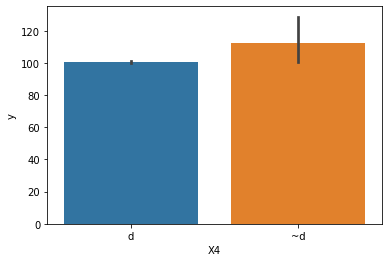

In [255]:
sns.barplot(x=merc_train.X4,y=merc_train.y)

## Analyzing feature X5 ##

In [256]:
merc_train.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     212
m     208
p     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
u       1
g       1
h       1
y       1
Name: X5, dtype: int64

In [257]:
def transform_X5(df):
    x5_grp=df.groupby('X5').aggregate(func='count')['ID'].reset_index()
    df['X5'].replace(to_replace=x5_grp[x5_grp['ID']<100]['X5'].values
                    ,value='OT'
                    ,inplace=True)

In [258]:
transform_X5(merc_train)

In [259]:
merc_train.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     212
p     208
m     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
OT    130
j     125
aa    112
Name: X5, dtype: int64

<AxesSubplot:xlabel='X5', ylabel='y'>

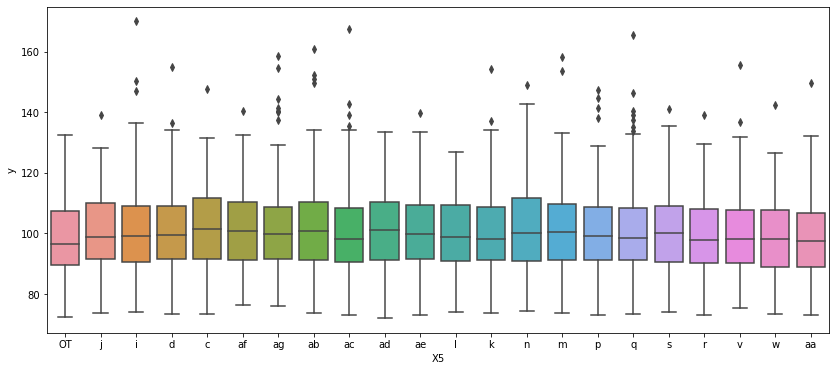

In [260]:
plt.figure(figsize=(14,6))
sns.boxplot(x=merc_train.X5,y=merc_train.y)

<AxesSubplot:xlabel='X5', ylabel='y'>

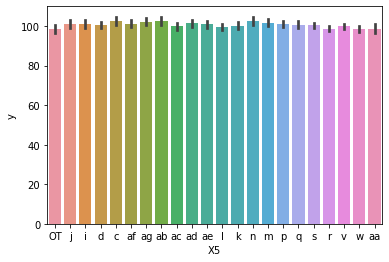

In [261]:
sns.barplot(x=merc_train.X5,y=merc_train.y)

## Analyzing feature X6 ## 

In [262]:
merc_train.X6.value_counts()

g    1042
j    1039
d     625
i     488
l     477
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

<AxesSubplot:xlabel='X6', ylabel='y'>

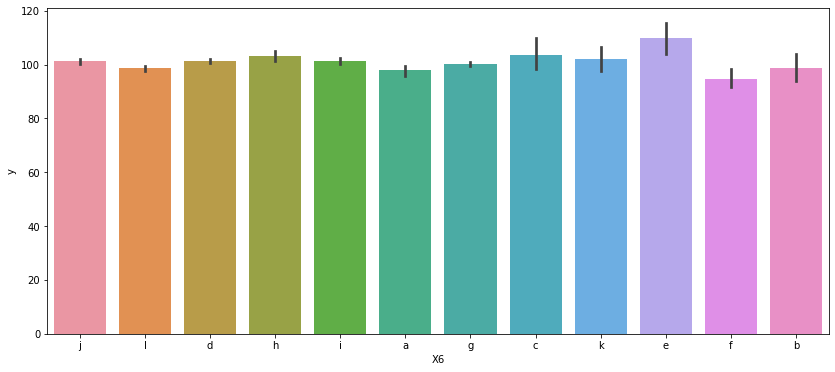

In [263]:
plt.figure(figsize=(14,6))
sns.barplot(x=merc_train.X6,y=merc_train.y)

## Analyzing feature X8 ##

In [264]:
merc_train.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    163
m    155
g    130
u    119
t    118
q    117
h    117
y    116
x    105
d    103
l    101
c    100
p    100
Name: X8, dtype: int64

<AxesSubplot:xlabel='X8', ylabel='y'>

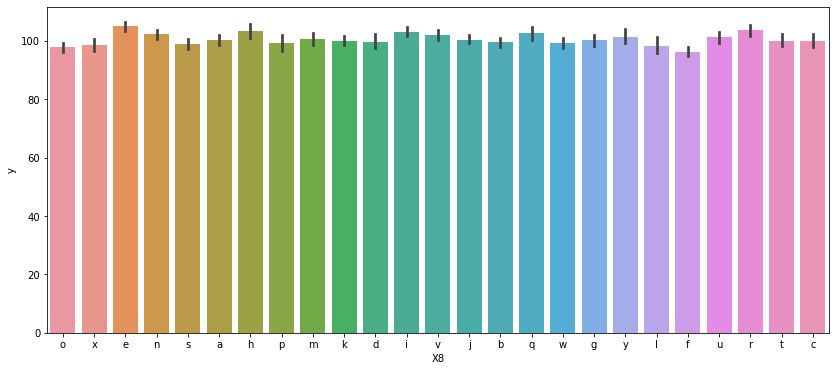

In [265]:
plt.figure(figsize=(14,6))
sns.barplot(x=merc_train.X8,y=merc_train.y)

**From the above barplots on categorical features, it is evident that outcome(y) is not majorly impacted by these features**

## Applying label encoder on categorical features to convert them to numerical##

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
x=merc_train.drop(columns='y')
y=merc_train.y

In [58]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,OT,v,at,a,d,OT,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,OT,OT,av,e,d,OT,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,OT,n,c,d,OT,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,OT,n,f,d,OT,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,OT,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
catCols=merc_train.select_dtypes(include="object").columns

In [60]:
catCols

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [61]:
def transform_labels(df,x):
    catCols=df.select_dtypes(include="object").columns
    le=LabelEncoder()
    for i in catCols:
        le.fit(x[i])
        x[i]=le.transform(x[i])

In [62]:
transform_labels(merc_train,x)

In [63]:
x.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,9,17,0,0,0,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,19,4,0,0,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,5,0,34,2,0,0,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,5,0,34,5,0,0,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,5,9,34,5,0,0,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#from sklearn.preprocessing import StandardScaler

In [65]:
#stdsclr=StandardScaler()
#stdsclr.fit(x)

In [66]:
#x_std=stdsclr.transform(x)

**From the above barplots, we can say that categorical features X1,X2,X3,X5,X7,X8 are not making much impact on the outcome, so considering PCA on X0,X4,X6**

## Trying to reduce dimensions using PCA ##

In [67]:
from sklearn.decomposition import PCA

In [68]:
pcaModel=PCA()

In [69]:
#x_pca_data = x.iloc[:,0:8]#x[['X0','X4','X6']] #

In [70]:
pcaModel.fit(x)

PCA()

In [71]:
pcaModel.explained_variance_ratio_

array([9.99955823e-01, 2.02031274e-05, 8.27667759e-06, 4.71581853e-06,
       4.10984489e-06, 1.56398011e-06, 1.35712049e-06, 6.84232687e-07,
       3.74995735e-07, 2.76672393e-07, 2.19715927e-07, 2.07779711e-07,
       1.83664337e-07, 1.51466846e-07, 1.31700482e-07, 1.15328477e-07,
       9.26779299e-08, 8.71780908e-08, 7.61437627e-08, 7.02787075e-08,
       6.33831541e-08, 5.82102981e-08, 5.66250743e-08, 5.12223311e-08,
       4.59628637e-08, 4.35647271e-08, 3.90046984e-08, 3.72616148e-08,
       3.40363069e-08, 3.23086142e-08, 3.13806920e-08, 2.88308323e-08,
       2.81535023e-08, 2.63693700e-08, 2.57326121e-08, 2.43771146e-08,
       2.23981286e-08, 2.08792599e-08, 1.93239882e-08, 1.86595424e-08,
       1.76475558e-08, 1.69603739e-08, 1.61863569e-08, 1.58910084e-08,
       1.54263656e-08, 1.51046694e-08, 1.36777039e-08, 1.33847659e-08,
       1.29593011e-08, 1.26448189e-08, 1.22608871e-08, 1.22260219e-08,
       1.17827282e-08, 1.13101376e-08, 1.06150305e-08, 1.02315367e-08,
      

In [72]:
pcaModel.explained_variance_ratio_.cumsum()*100

array([ 99.9955823 ,  99.99760261,  99.99843028,  99.99890186,
        99.99931285,  99.99946925,  99.99960496,  99.99967338,
        99.99971088,  99.99973855,  99.99976052,  99.9997813 ,
        99.99979966,  99.99981481,  99.99982798,  99.99983951,
        99.99984878,  99.9998575 ,  99.99986511,  99.99987214,
        99.99987848,  99.9998843 ,  99.99988996,  99.99989509,
        99.99989968,  99.99990404,  99.99990794,  99.99991167,
        99.99991507,  99.9999183 ,  99.99992144,  99.99992432,
        99.99992714,  99.99992977,  99.99993235,  99.99993478,
        99.99993702,  99.99993911,  99.99994104,  99.99994291,
        99.99994468,  99.99994637,  99.99994799,  99.99994958,
        99.99995112,  99.99995263,  99.999954  ,  99.99995534,
        99.99995663,  99.9999579 ,  99.99995912,  99.99996035,
        99.99996153,  99.99996266,  99.99996372,  99.99996474,
        99.99996571,  99.99996667,  99.99996761,  99.99996853,
        99.99996941,  99.99997024,  99.99997106,  99.99

In [73]:
pcaModel.components_

array([[ 9.99998692e-01, -5.05241452e-05,  6.52198546e-05, ...,
        -1.56204891e-07, -1.37374861e-07,  4.49791750e-07],
       [ 9.78264751e-05, -4.32766924e-02,  3.61512507e-02, ...,
        -8.08001994e-05, -6.68612003e-06, -1.80232582e-05],
       [-3.32068350e-05,  2.60907543e-02, -1.38988584e-02, ...,
         2.09750464e-04,  2.81531175e-05,  2.32822698e-04],
       ...,
       [ 0.00000000e+00, -8.13714377e-19,  8.21722548e-18, ...,
         5.91974386e-17, -5.01985606e-17, -4.05586365e-02],
       [ 0.00000000e+00,  4.34162915e-19, -1.84515684e-18, ...,
        -2.74435311e-18,  4.91867023e-18, -1.27903545e-16],
       [-0.00000000e+00,  9.24042620e-16,  2.17415846e-16, ...,
         7.67537076e-14,  9.45046992e-14, -5.40702196e-03]])

**When included ID, ID feature alone is able to explain 99%, but removing ID** 

In [74]:
pcaModel=PCA(n_components=120)

In [75]:
x.drop(columns=['ID'],inplace=True)

In [76]:
pcaModel.fit(x)

PCA(n_components=120)

In [77]:
x_pca=pd.DataFrame(pcaModel.transform(x))

In [78]:
pcaModel.explained_variance_ratio_.cumsum()*100

array([43.1998066 , 60.8938594 , 75.2247611 , 85.30276091, 88.6459392 ,
       91.5468846 , 93.01091725, 93.8126853 , 94.40411854, 94.87389142,
       95.31840364, 95.71152368, 96.03608435, 96.31761122, 96.56431308,
       96.76272104, 96.94902682, 97.11260937, 97.26280796, 97.39831897,
       97.52304452, 97.6441231 , 97.75370923, 97.8520118 , 97.94565995,
       98.02914534, 98.10879036, 98.1815388 , 98.25091216, 98.31797932,
       98.37959819, 98.43976977, 98.49614063, 98.55128592, 98.60349218,
       98.65140497, 98.69605446, 98.7373834 , 98.77739481, 98.81512074,
       98.8515064 , 98.88617091, 98.92018397, 98.95319717, 98.9858438 ,
       99.01508067, 99.04383862, 99.07154449, 99.09859107, 99.12485681,
       99.15098463, 99.17621683, 99.20038738, 99.22308156, 99.2449524 ,
       99.26581685, 99.28634895, 99.30634408, 99.32596393, 99.34486869,
       99.36261243, 99.38016081, 99.39674994, 99.41328221, 99.42861605,
       99.44359071, 99.45807464, 99.47246799, 99.48605164, 99.49

In [79]:
pcaModel.components_

array([[-4.28752202e-02,  3.57029823e-02,  9.92960039e-01, ...,
        -7.98656974e-05, -6.09968323e-06, -2.09839271e-05],
       [ 2.48295675e-02, -1.28040733e-02,  7.81224831e-02, ...,
         2.07694272e-04,  2.81316388e-05,  2.39828219e-04],
       [ 3.77244314e-02, -2.87052731e-02, -6.61920907e-03, ...,
         5.10397785e-05, -1.92373784e-05, -1.87643318e-04],
       ...,
       [-2.72971786e-03, -2.14842874e-03, -1.04093874e-03, ...,
        -1.54293170e-02,  3.92203958e-03,  1.18934325e-02],
       [-2.57637192e-03,  1.18277122e-04,  6.49147978e-04, ...,
         2.35081651e-02,  1.78182746e-03,  5.35782740e-02],
       [-2.47566818e-03,  2.67810940e-03, -1.70603515e-03, ...,
         1.30356861e-02,  4.89369087e-03, -9.30018174e-03]])

In [80]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.360851,1.626849,10.934988,-8.098682,0.692279,-3.559976,4.046201,-2.356005,0.373682,0.983612,...,-0.028472,0.192643,-0.318154,-0.085126,-0.462638,0.722380,-0.299466,0.311906,-0.112179,-0.398258
1,1.862021,1.893737,11.162599,-6.713501,-6.213841,-0.031852,-2.025817,-0.758965,1.681262,-1.063300,...,-0.076036,0.205665,0.136613,0.394176,0.089378,-0.040263,-0.231890,0.237411,-0.059766,-0.094651
2,16.011201,12.165398,11.671780,-1.796760,-4.314091,1.720922,-0.918421,-0.958553,2.537843,0.032485,...,0.336831,-0.342882,-0.144305,0.015466,-0.027628,0.141088,0.146691,0.506816,-0.304867,-0.157267
3,17.466888,-6.729395,10.774094,-1.160809,-5.618582,-0.081350,-3.784070,-1.414364,1.474586,-0.241837,...,0.090830,0.235125,-0.136106,-0.019570,0.082650,0.018832,0.454238,-0.166378,-0.271396,0.401950
4,16.946298,2.010264,10.851935,-2.900339,5.876233,0.723333,-1.846557,-2.149953,-1.201470,-0.051498,...,-0.120456,0.158842,0.048827,-0.025735,-0.254381,-0.060684,0.033742,0.061749,-0.081318,-0.185716


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,random_state=10,train_size=0.75)

In [83]:
from xgboost import XGBRegressor,plot_importance

In [84]:
xgbModel=XGBRegressor(max_depth=3, min_child_weight=4, reg_lambda=1000, gamma = 100)

**Tried different values of lambda like 10,100,1000, observed scores improvement for higher values of lambda, so will be performing grid search with high values**

In [85]:
xgbModel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=100, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1000, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
xgbModel.score(x_train,y_train)

0.6572558331419365

In [87]:
xgbModel.score(x_test,y_test)

0.5242877882676406

**Above model is overfit, so now trying with PCA only on categorical features**

***PCA on categorical features, tried with same number of components, and observed 99.99% variance ratio is achieved by 7 components, so fixed n_components to 7***

In [88]:
pcaModel=PCA(n_components=7)
pcaModel.fit(x.iloc[:,0:9])
x_pca_c=pd.DataFrame(pcaModel.transform(x.iloc[:,0:9]),columns=['C1','C2','C3','C4','C5','C6','C7'])

In [89]:
pd.DataFrame(pcaModel.components_,columns=(x.iloc[:,0:9]).columns)

,X0,X1,X2,X3,X4,X5,X6,X8,X10
0,-0.042153,0.035592,0.995156,-0.014694,0.000004,-0.012677,0.018473,-0.076831,0.000411
1,0.024341,-0.012227,0.078629,-0.004005,0.000014,0.048981,0.012991,0.995234,0.000351
2,0.035595,-0.028134,-0.006720,-0.001503,0.000195,-0.997705,0.012257,0.048251,0.000197
3,0.987627,-0.137127,0.044013,-0.035763,-0.000073,0.037499,0.013118,-0.031478,0.002060
4,0.095527,0.579580,0.000486,0.083108,0.000052,-0.022142,-0.804529,0.016673,-0.004392
5,-0.106900,-0.794959,0.033852,-0.065497,0.000253,0.011054,-0.592491,-0.002900,0.000469
6,0.020035,-0.105369,0.018796,0.993620,-0.000288,0.002431,0.029043,0.000230,0.003537


In [90]:
pcaModel.explained_variance_ratio_.cumsum()

array([0.46841257, 0.660989  , 0.81698928, 0.92340284, 0.95783917,
       0.98855634, 0.99994622])

In [91]:
x_pca_c=pd.concat([x_pca_c,merc_train.ID],axis=1)

In [92]:
x_non_pca=pd.concat([x.iloc[:,9:],merc_train.ID],axis=1)

In [93]:
x_pca=pd.merge(left=x_pca_c,right=x_non_pca,on='ID',how='inner')

In [94]:
x_pca.drop(columns=['ID'],inplace=True)

In [95]:
x_pca

,C1,C2,C3,C4,C5,C6,C7,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.198954,1.616359,10.923829,-8.113448,0.214179,-4.076486,-3.490563,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.847106,1.893616,11.182094,-6.908097,-6.277695,1.698880,1.527916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15.864642,12.133895,11.672028,-1.547777,-4.199876,2.962037,-0.133222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17.317297,-6.761593,10.775261,-1.030741,-5.876388,1.635671,2.901362,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.798361,1.981552,10.858260,-2.653132,5.926119,-0.805132,1.722765,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,22.916251,-3.250404,9.907160,1.170713,-2.602643,4.128296,0.953919,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4204,21.713136,-6.626085,9.336919,-4.900983,2.640159,-1.761857,-3.142760,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,7.578831,8.296185,10.235139,-7.791041,-2.056715,-3.734564,1.900540,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4206,-15.148840,8.868998,10.956625,6.033811,3.172155,-2.929668,-1.338076,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Defining a function to perform PCA on categorical features using the above approach ##

In [96]:
def perform_pca(df,x):
    pcaModel=PCA(n_components=7)
    pcaModel.fit(x.iloc[:,0:9])
    x_pca_c=pd.DataFrame(pcaModel.transform(x.iloc[:,0:9]),columns=['C1','C2','C3','C4','C5','C6','C7'])
    x_pca_c=pd.concat([x_pca_c,df.ID],axis=1)
    x_non_pca=pd.concat([x.iloc[:,9:],df.ID],axis=1)
    x_pca=pd.merge(left=x_pca_c,right=x_non_pca,on='ID',how='inner')
    x_pca.drop(columns=['ID'],inplace=True)
    return x_pca

In [97]:
x_pca=perform_pca(merc_train,x)

In [98]:
x_pca.head()

,C1,C2,C3,C4,C5,C6,C7,X12,X13,X14,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.198954,1.616359,10.923829,-8.113448,0.214179,-4.076486,-3.490563,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1.847106,1.893616,11.182094,-6.908097,-6.277695,1.698880,1.527916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,15.864642,12.133895,11.672028,-1.547777,-4.199876,2.962037,-0.133222,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17.317297,-6.761593,10.775261,-1.030741,-5.876388,1.635671,2.901362,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16.798361,1.981552,10.858260,-2.653132,5.926119,-0.805132,1.722765,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,random_state=10,train_size=0.75)
xgbModel=XGBRegressor(max_depth=4, min_child_weight=5, reg_lambda=100, gamma = 200)
xgbModel.fit(x_train,y_train)
print(xgbModel.score(x_train,y_train))
print(xgbModel.score(x_test,y_test))

0.6321801825396922
0.5806711418128008


C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Grid Search with cv=5##

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {'reg_lambda': [100,200,500],  
              'gamma':[100, 150, 200],
              'min_child_weight':[4,5,6]
             }
#grid = GridSearchCV(XGBRegressor(), param_grid, refit = True, verbose = 3, cv=5) 
#grid.fit(x_train,y_train)

In [102]:
#grid.best_params_

In [103]:
#grid.best_estimator_

In [104]:
xgbModel_final=XGBRegressor(max_depth=4, min_child_weight=4, reg_lambda=100, gamma=150)

In [105]:
xgbModel_final.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=150, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=100, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
xgbModel_final.score(x_train,y_train)

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.6333710677074157

In [107]:
xgbModel_final.score(x_test,y_test)

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.5780222381620721

In [108]:
xgb_feature_imp=(pd.DataFrame(xgbModel_final.feature_importances_,index=x_pca.columns))

In [109]:
xgb_feature_imp.sort_values(by=0)#,ascending=False)

,0
X192,0.000000
X254,0.000000
X253,0.000000
X252,0.000000
X251,0.000000
...,...
X52,0.010481
X118,0.095044
X127,0.145874
X29,0.259550


In [110]:
xgb_feature_imp[xgb_feature_imp[0]==0].index.values.size

325

**Important observation here is, Feature importance is 0 for 311 features.**

## Predicting outcome on test data ##

In [111]:
merc_test = pd.read_csv('test.csv')

In [112]:
merc_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [113]:
var_zero_cols(merc_test)

['X257', 'X258', 'X295', 'X296', 'X369']

**Dropping zero variance features of training set, from test set, as the above model is not trained on those features**

In [114]:
merc_test.drop(columns=['X297', 'X11', 'X290', 'X293', 'X268', 'X233', 'X93', 'X289', 'X235', 'X107', 'X330', 'X347'],inplace=True)

In [115]:
transform_X0(merc_test)

In [116]:
transform_X4(merc_test)

In [117]:
transform_X1(merc_test)

In [118]:
transform_X5(merc_test)

In [119]:
x=merc_test.drop(columns=['ID'])

In [120]:
transform_labels(merc_test,x)

In [121]:
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,5,9,34,5,0,0,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,11,3,8,0,0,0,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5,9,17,5,0,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5,6,34,5,0,0,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,12,8,17,2,0,0,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [122]:
x_pca_t=perform_pca(merc_test,x)

In [123]:
x_pca_t.shape

(4209, 362)

In [124]:
merc_test_pred=pd.DataFrame(xgbModel_final.predict(x_pca_t),columns=['y'])

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [125]:
merc_test_pred['ID']=merc_test.ID

In [126]:
merc_test_pred.tail(10)

,y,ID
4199,92.938965,8401
4200,93.341011,8404
4201,93.557182,8407
4202,112.552383,8408
4203,110.724716,8409
4204,104.178246,8410
4205,92.051994,8411
4206,90.817230,8413
4207,112.110992,8414
4208,92.728043,8416


In [127]:
merc_test_pred.to_csv('Mercedes_TestData_Predictions.csv',index=False)